# Библиотека matplotlib

In [2]:
import datetime as dt
from matplotlib import pyplot as plt
import pandas as pd
from pandas import Timestamp
dat = pd.read_csv('ap-northeast-1.csv')

In [3]:
dat.loc[len(dat)] = dat.columns
dat.columns = ['datetime', 'type', 'OS', 'where', 'price']
dat

,datetime,type,OS,where,price
0,2017-05-08 21:46:36+00:00,c3.8xlarge,Windows,ap-northeast-1c,1.7461
1,2017-05-08 21:46:34+00:00,i3.large,SUSE Linux,ap-northeast-1c,0.1223
2,2017-05-08 21:46:34+00:00,i3.large,Linux/UNIX,ap-northeast-1c,0.0223
3,2017-05-08 21:46:17+00:00,c4.8xlarge,SUSE Linux,ap-northeast-1a,0.789
4,2017-05-08 21:46:17+00:00,c4.8xlarge,Linux/UNIX,ap-northeast-1a,0.689
...,...,...,...,...,...
1956995,2017-03-30 07:25:13+00:00,m4.xlarge,Windows,ap-northeast-1c,0.2394
1956996,2017-03-30 07:25:13+00:00,c3.2xlarge,SUSE Linux,ap-northeast-1c,0.1976
1956997,2017-03-30 07:25:13+00:00,c3.2xlarge,Linux/UNIX,ap-northeast-1c,0.0976
1956998,2017-03-30 07:25:12+00:00,m4.large,Windows,ap-northeast-1c,0.121


In [4]:
dat['datetime'] = pd.to_datetime(dat['datetime'], format="%Y-%m-%d %H:%M:%S%z")

In [5]:
prices = dat.groupby(['OS', 'type', 'where'])

In [6]:
windows_i_types = []
for i in dat.groupby(['OS']).get_group('Windows')['type'].unique():
    if i[0] == 'i':
        windows_i_types.append(i)

In [7]:
windows_areas = []
for i in dat.groupby(['OS']).get_group('Windows')['where'].unique():
    windows_areas.append(i)

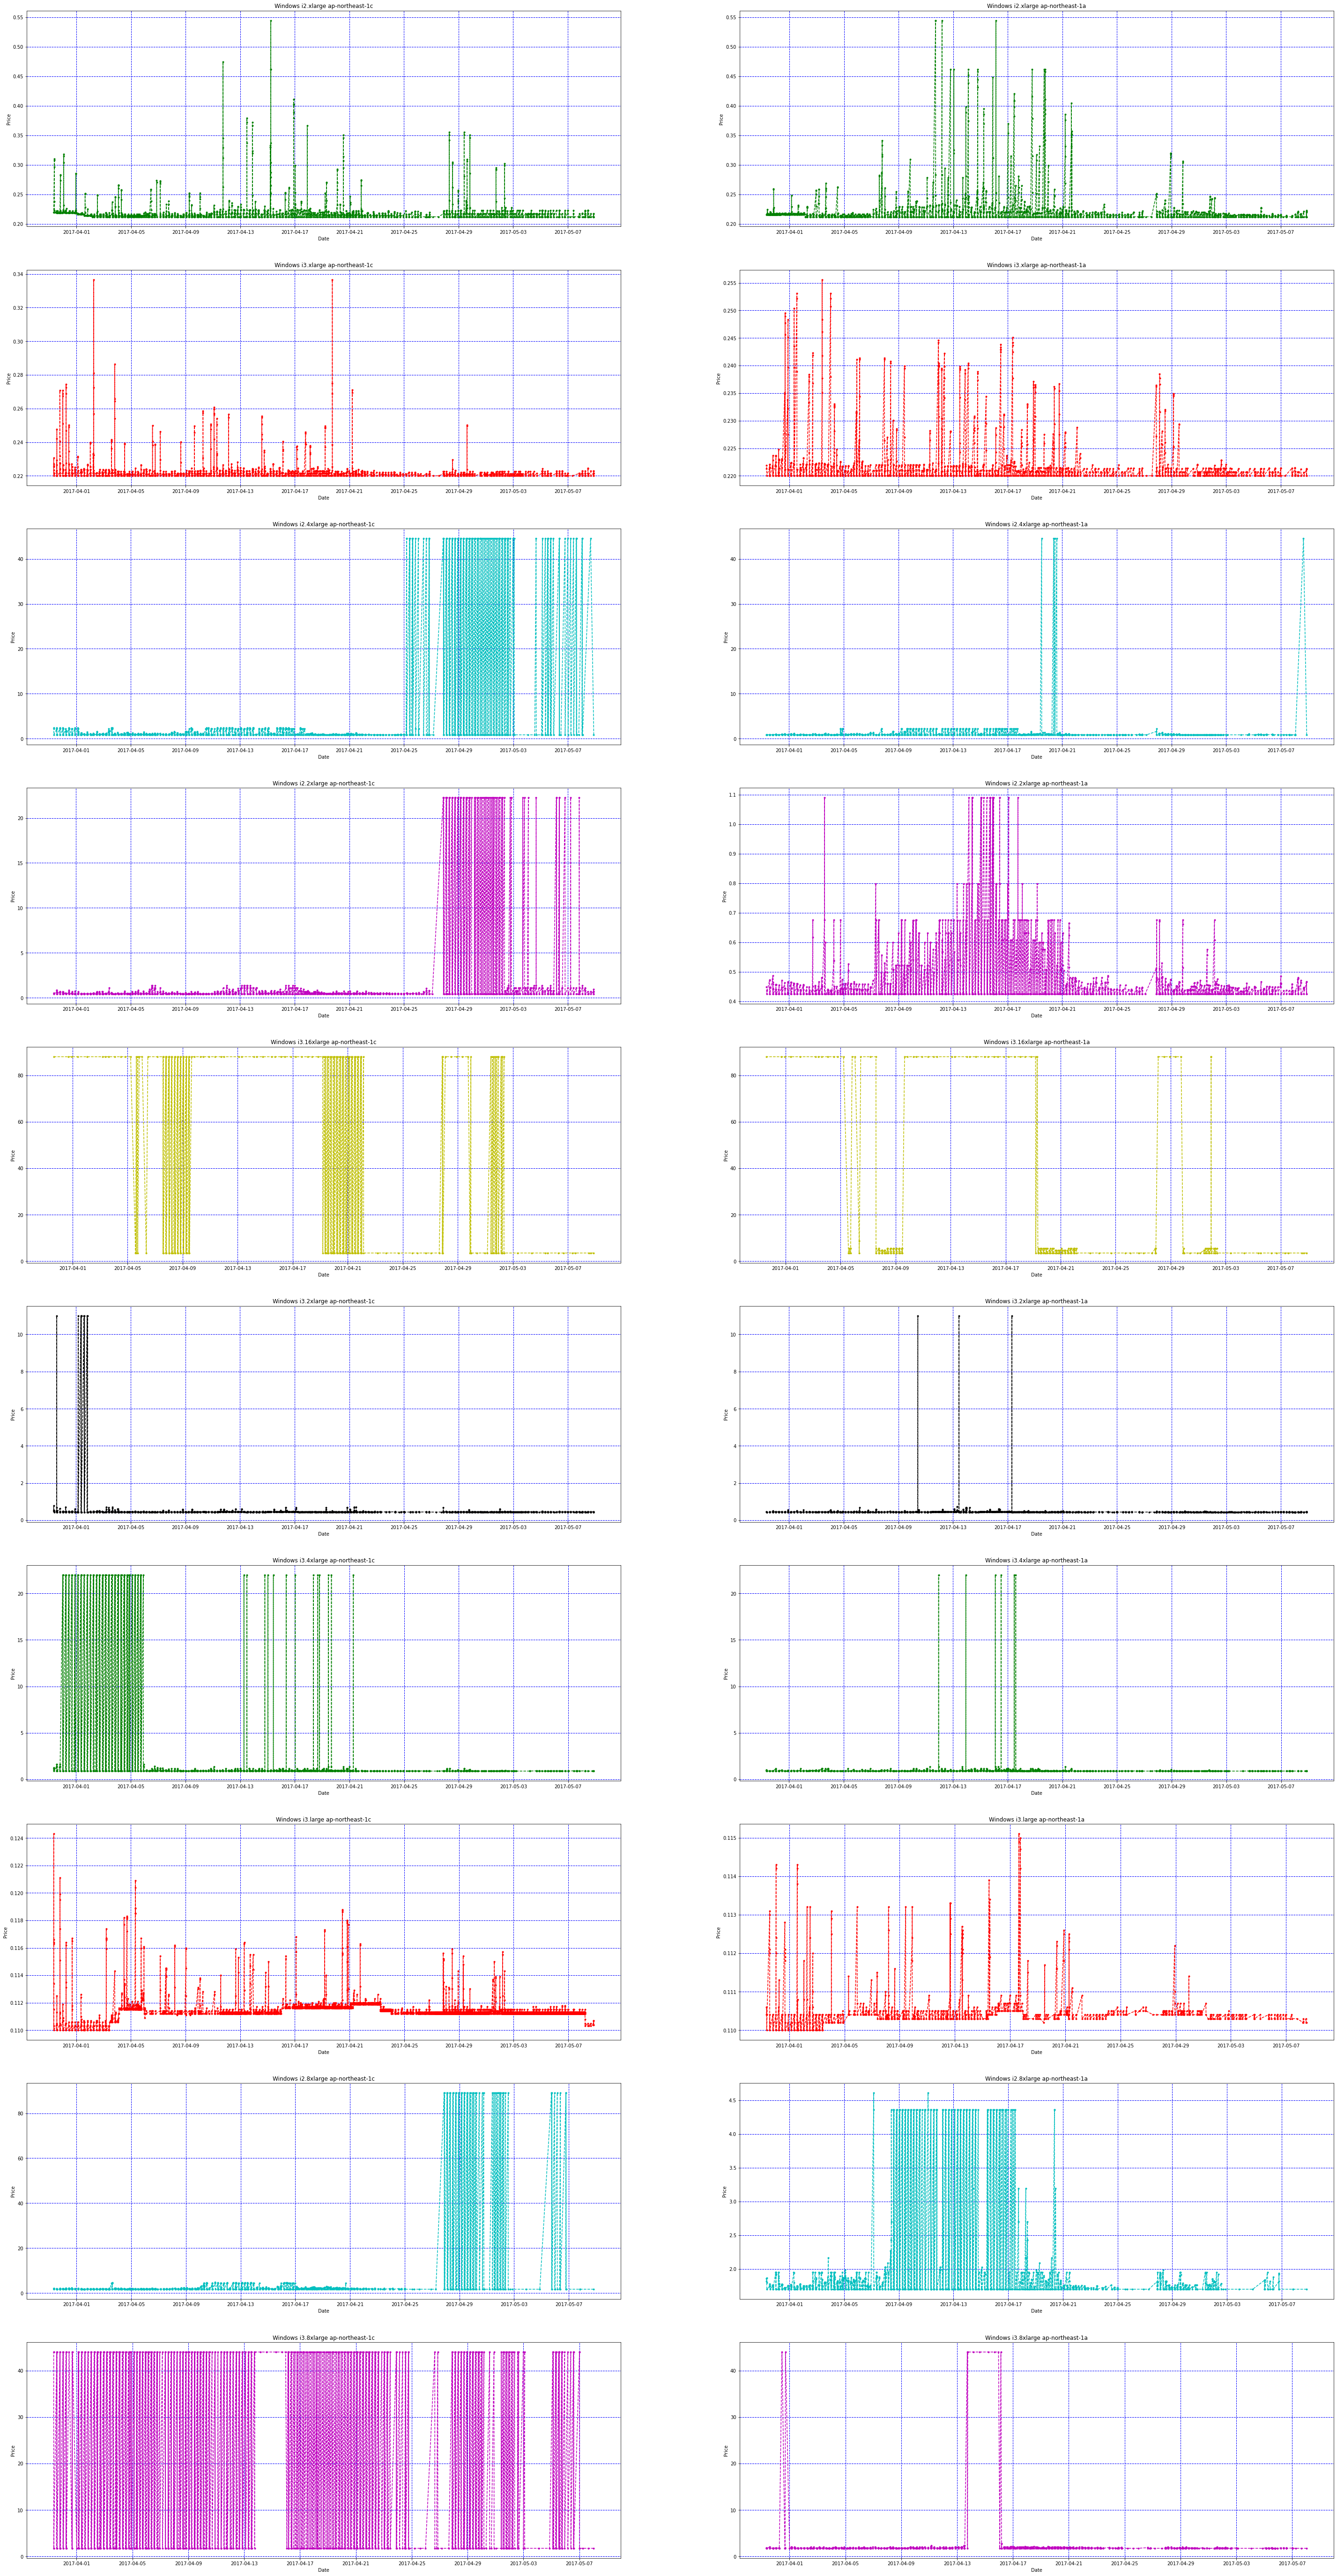

In [38]:
import matplotlib.ticker as ticker
archi_number = len(windows_i_types)
areas_number = len(windows_areas)
fig, axes = plt.subplots(archi_number, areas_number, figsize=(50,100))
colors = ['g', 'r', 'c', 'm', 'y', 'k']
for i in range(archi_number):
    for j in range(areas_number):
        axes[i,j].plot(prices.get_group(('Windows', windows_i_types[i], windows_areas[j]))['datetime'], 
                     prices.get_group(('Windows', windows_i_types[i], windows_areas[j]))['price'],
                     color = colors[i%len(colors)],
                     marker = '.',
                     linestyle = 'dashed')
        axes[i,j].set_title(f'Windows {windows_i_types[i]} {windows_areas[j]}')
        axes[i,j].set_xlabel('Date')
        axes[i,j].set_ylabel('Price')
        axes[i,j].grid(color = 'b', linewidth = 1, linestyle = '--')
        axes[i,j].xaxis.set_major_locator(ticker.MultipleLocator(4))